Тимошенко Володимир

Практична 7.2


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/mxnlm/Downloads/OneDrive_1_11.11.2023/museum_visitors.csv")

Виведення перших 5 рядків

In [4]:
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Попередній аналіз даних

In [5]:
print("\nРозмір датасету:", df.shape)
print("Типи даних:\n", df.dtypes)
print("Кількість пропусків:\n", df.isnull().sum())


Розмір датасету: (59, 5)
Типи даних:
 Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
 Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


Перевірка та видалення дублікатів

In [6]:
df = df.drop_duplicates()
print("\nРозмір таблиці після видалення дублікатів:", df.shape)


Розмір таблиці після видалення дублікатів: (59, 5)


Інформація про роки в датасеті

In [8]:
print("\nІнформація про роки в датасеті:")
print(df['Date'].unique())


Інформація про роки в датасеті:
['2014-01-01' '2014-02-01' '2014-03-01' '2014-04-01' '2014-05-01'
 '2014-06-01' '2014-07-01' '2014-08-01' '2014-09-01' '2014-10-01'
 '2014-11-01' '2014-12-01' '2015-01-01' '2015-02-01' '2015-03-01'
 '2015-04-01' '2015-05-01' '2015-06-01' '2015-07-01' '2015-08-01'
 '2015-09-01' '2015-10-01' '2015-11-01' '2015-12-01' '2016-01-01'
 '2016-02-01' '2016-03-01' '2016-04-01' '2016-05-01' '2016-06-01'
 '2016-07-01' '2016-08-01' '2016-09-01' '2016-10-01' '2016-11-01'
 '2016-12-01' '2017-01-01' '2017-02-01' '2017-03-01' '2017-04-01'
 '2017-05-01' '2017-06-01' '2017-07-01' '2017-08-01' '2017-09-01'
 '2017-10-01' '2017-11-01' '2017-12-01' '2018-01-01' '2018-02-01'
 '2018-03-01' '2018-04-01' '2018-05-01' '2018-06-01' '2018-07-01'
 '2018-08-01' '2018-09-01' '2018-10-01' '2018-11-01']


Зміна назв стовпців

In [30]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Середня кількість відвідувачів для кожного музею

In [31]:
avg_visitors = df.mean()

Мінімальна та максимальна кількість відвідувачів за 2018 рік

In [37]:
min_visitors_2018 = df[df['date'].dt.year == 2018].min()
max_visitors_2018 = df[df['date'].dt.year == 2018].max()
print(min_visitors_2018)
print(max_visitors_2018)

date                                    2018-01-31 00:00:00
avila_adobe                                           14718
firehouse_museum                                       3306
chinese_american_museum                                2146
america_tropical_interpretive_center                   3180
dtype: object
date                                    2018-11-30 00:00:00
avila_adobe                                           25173
firehouse_museum                                       8013
chinese_american_museum                                4960
america_tropical_interpretive_center                   5837
dtype: object


Місяці з найвищою і найнижчою загальною кількістю відвідувачів для 2015 року

In [36]:
min_visitors_2015 = df[df['date'].dt.year == 2015].min()
max_visitors_2015 = df[df['date'].dt.year == 2015].max()
print(min_visitors_2015)
print(max_visitors_2015)

date                                    2015-01-31 00:00:00
avila_adobe                                           15578
firehouse_museum                                       3742
chinese_american_museum                                1398
america_tropical_interpretive_center                   5907
dtype: object
date                                    2015-12-31 00:00:00
avila_adobe                                           41242
firehouse_museum                                      12528
chinese_american_museum                                4009
america_tropical_interpretive_center                  13207
dtype: object


Порівняння кількості відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року

In [39]:
summer_visitors = df[(df['date'].dt.year == 2018) & ((df['date'].dt.month >= 6) & (df['date'].dt.month <= 8))]['avila_adobe'].sum()
winter_visitors = df[(df['date'].dt.year == 2018) & ((df['date'].dt.month <= 2) | (df['date'].dt.month == 12))]['avila_adobe'].sum()
print(summer_visitors)
print(winter_visitors)

66122
30983


Знайдення кореляції між кількістю відвідувачів та датами у 2016 році

In [44]:
correlation_2016 = df[df['date'].dt.year == 2016].corr()
print(correlation_2016)

                                          date  avila_adobe  firehouse_museum  \
date                                  1.000000     0.063177         -0.198857   
avila_adobe                           0.063177     1.000000          0.737200   
firehouse_museum                     -0.198857     0.737200          1.000000   
chinese_american_museum              -0.413020     0.089054          0.553935   
america_tropical_interpretive_center -0.226225     0.436561          0.247389   

                                      chinese_american_museum  \
date                                                -0.413020   
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
date                                         

Теплокарта кореляції

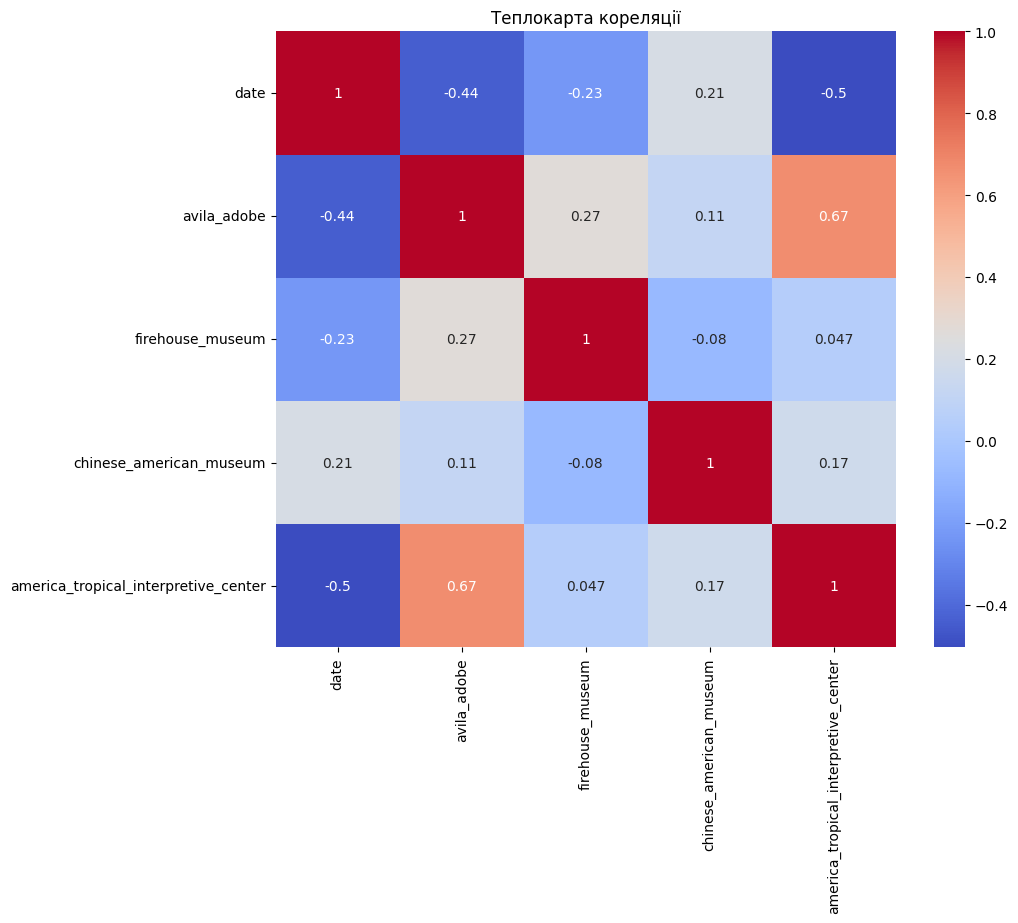

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплокарта кореляції')
plt.show()

Графік ліній для кожного музею у 2017 році

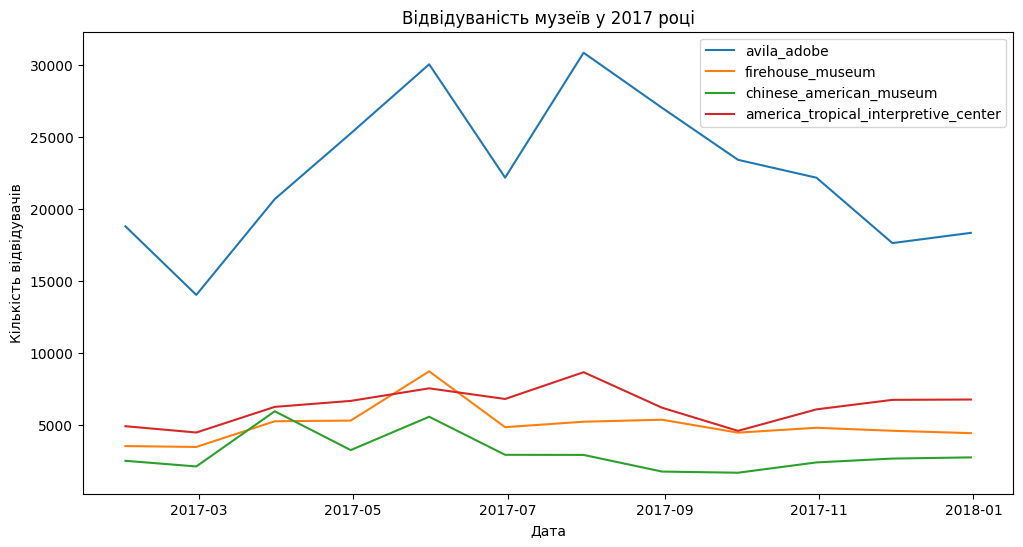

In [46]:
plt.figure(figsize=(12, 6))
for museum in df.columns[1:]:
    plt.plot(df[df['date'].dt.year == 2017]['date'], df[df['date'].dt.year == 2017][museum], label=museum)

plt.title('Відвідуваність музеїв у 2017 році')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()
plt.show()


Графіки розсіювання для кожного музею за 2018 рік

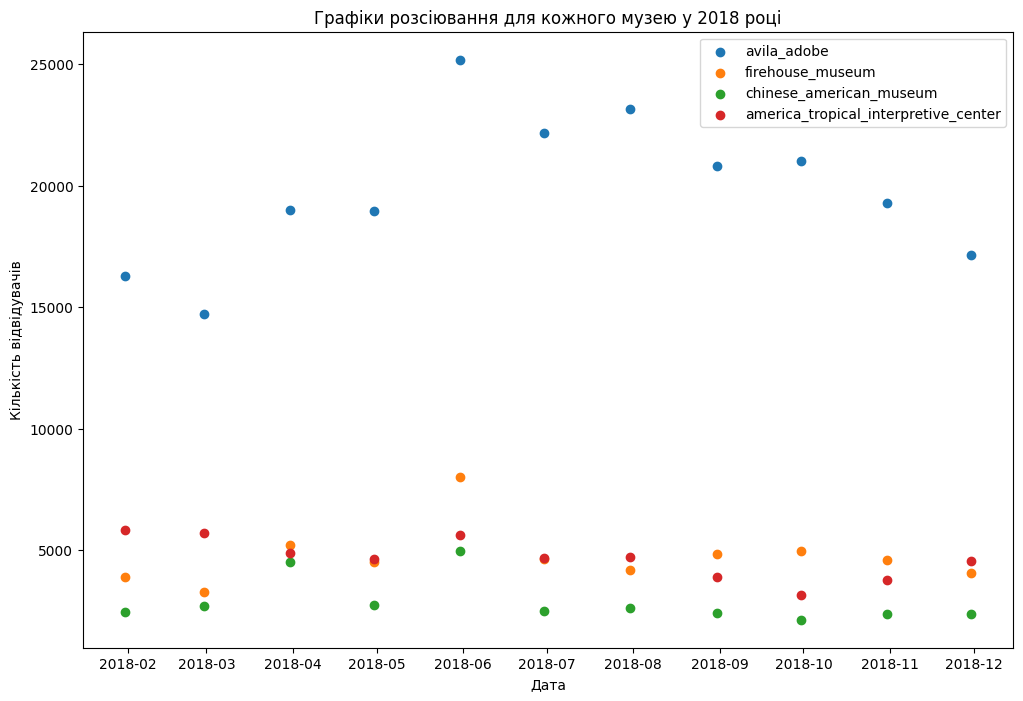

In [47]:
plt.figure(figsize=(12, 8))
for museum in df.columns[1:]:
    plt.scatter(df[df['date'].dt.year == 2018]['date'], df[df['date'].dt.year == 2018][museum], label=museum)

plt.title('Графіки розсіювання для кожного музею у 2018 році')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()
plt.show()


Гістограми відвідуваності за місяцями для кожного музею

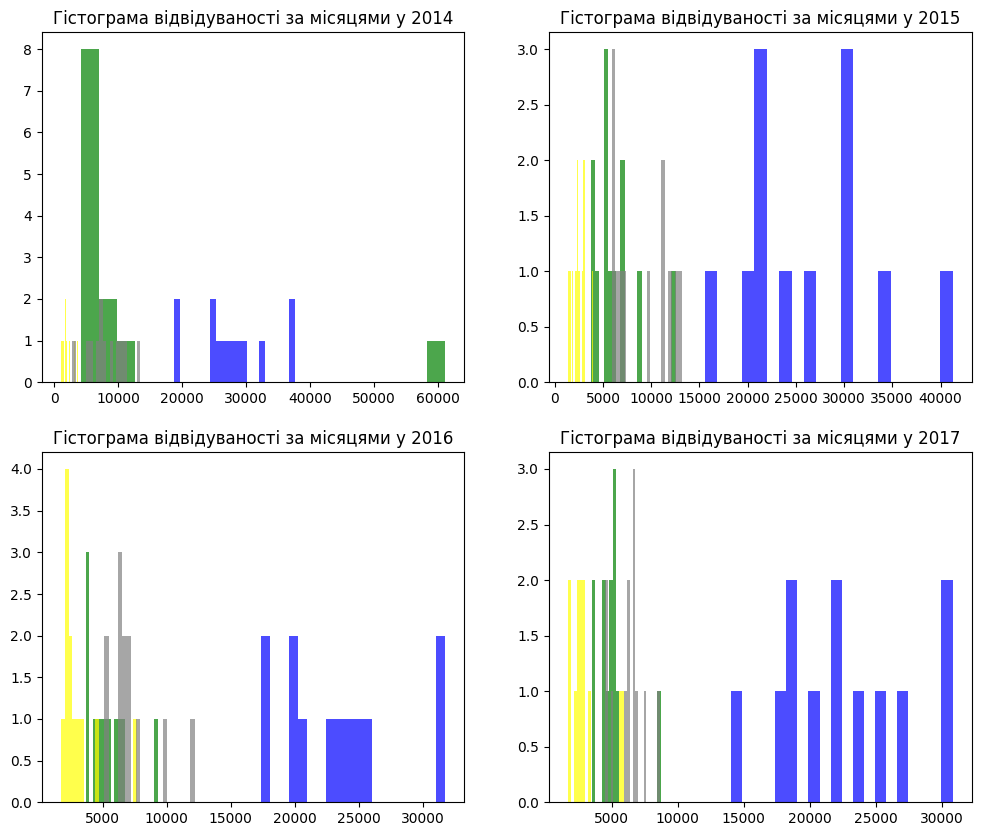

In [48]:
years = [2014, 2015, 2016, 2017]
colors = ['blue', 'green', 'yellow', 'grey']

plt.figure(figsize=(12, 10))
for i, year in enumerate(years):
    plt.subplot(2, 2, i + 1)
    for museum, color in zip(df.columns[1:], colors):
        plt.hist(df[(df['date'].dt.year == year)][museum], bins=20, alpha=0.7, color=color, label=museum)

    plt.title(f'Гістограма відвідуваності за місяцями у {year}')

Аналізуючи набір даних про відвідуваність музеїв, виявлено, що кількість відвідувачів в 2018 році в музеї "Avila Adobe" взимку значно перевищує літню відвідуваність. Крім того, застосування методу кореляції показало невелику залежність між кількістю відвідувачів та датами у 2016 році.